In [1]:
import os
import pandas as pd
import json
from pandas.io.json import json_normalize 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import csv

In [2]:
# CODE TAKEN FROM https://snap.stanford.edu/data/web-Amazon.html

# import gzip
# import simplejson
# import json



# def parse(filename):
#   f = gzip.open(filename, 'r')
#   entry = {}
#   for l in f:
#     l = l.strip()
#     colonPos = l.find(':')
#     if colonPos == -1:
#       yield entry
#       entry = {}
#       continue
#     eName = l[:colonPos]
#     rest = l[colonPos+2:]
#     entry[eName] = rest
#   yield entry

# # for e in parse("amazon-meta.txt.gz"):
# #   print simplejson.dumps(e)

 
# data = parse("amazon-meta.txt.gz")
# # data = json.loads(json_data)
# print(data)

In [3]:
amazon_file  = open("amazon-meta.txt", "r")
file_list = amazon_file.read().split('\n\n')

In [4]:
# file_list[1].split('\n')

In [5]:
# file_list[2].split('\n')

In [6]:
d= {}
d['categories'] = []
l = '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]'
items = l.split(":")
key = re.sub(pattern=' ',repl= '',string=items[0]) 
key
d['categories'].append({'category': key})
d

{'categories': [{'category': '|Books[283155]|Subjects[1000]|Religion&Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]'}]}

In [7]:
def get_dict(list_lines, splits ):
    d = {}
    if len(list_lines) > 8: 
        d['individuals'] = []
        d['cat_entries'] = []
        
    for i in range(len(list_lines)):
        line = list_lines[i]
        items = line.split(splits)
        
        
        key = re.sub(pattern=' ',repl= '',string=items[0]) 
        
        if '|' in items[0][:10]: 
            d['cat_entries'].append({'category': key})  
            
        elif len(items) < 4:
            value = ':'.join(items[1:])
            d[key] = value
        else:
            # put the items back to its original form
            temp_value = ':'.join(items[1:])
            
            if key[-5:]== 'tomer':
                temp_value = 'date:' + ':'.join(items) 
                #key = 'individuals:' # master layer to all the inidividual reviews

            nest_dict = get_dict(re.findall(r"\w+:\s+\S+", temp_value), ':')
            if key[-5:]== 'tomer':
                d['individuals'].append(nest_dict) # nested reviews
            else: 
                d[key] = nest_dict 
    return d

get_dict(file_list[2].split('\n'), ':')

{'ASIN': ' 0827229534',
 'Id': '   1',
 'cat_entries': [{'category': '|Books[283155]|Subjects[1000]|Religion&Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]'},
  {'category': '|Books[283155]|Subjects[1000]|Religion&Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]'}],
 'categories': ' 2',
 'group': ' Book',
 'individuals': [{'cutomer': ' A2JW67OY8U6HHK',
   'date': '    2000-7-28',
   'helpful': '   9',
   'rating': ' 5',
   'votes': '  10'},
  {'cutomer': ' A2VE83MZF98ITY',
   'date': '    2003-12-14',
   'helpful': '   5',
   'rating': ' 5',
   'votes': '   6'}],
 'reviews': {'downloaded': ' 2', 'rating': ' 5', 'total': ' 2'},
 'salesrank': ' 396585',
 'similar': ' 5  0804215715  156101074X  0687023955  0687074231  082721619X',
 'title': ' Patterns of Preaching: A Sermon Sampler'}

In [8]:
dict_all = [get_dict(l.split('\n'), ':') for l in file_list if len(l.split('\n')) > 8]

In [9]:
dict_all[2].keys()

dict_keys(['individuals', 'cat_entries', 'Id', 'ASIN', 'title', 'group', 'salesrank', 'similar', 'categories', 'reviews'])

In [10]:
# with open('meta-data.json', 'w') as outfile:

#     json.dump([dict(k) for k in dict_all],outfile)

In [11]:
data = json_normalize(dict_all, 'individuals', 
                          ['Id','ASIN','title','group','categories','salesrank','similar',['reviews','total']])

In [12]:
data.head()

,cutomer,date,helpful,rating,votes,Id,ASIN,title,group,categories,salesrank,similar,reviews.total
0,A2JW67OY8U6HHK,2000-7-28,9,5,10,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,2,396585,5 0804215715 156101074X 0687023955 068707...,2
1,A2VE83MZF98ITY,2003-12-14,5,5,6,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,2,396585,5 0804215715 156101074X 0687023955 068707...,2
2,A11NCO6YTE4BTJ,2001-12-16,4,5,5,2,0738700797,Candlemas: Feast of Flames,Book,2,168596,5 0738700827 1567184960 1567182836 073870...,12
3,A9CQ3PLRNIR83,2002-1-7,5,4,5,2,0738700797,Candlemas: Feast of Flames,Book,2,168596,5 0738700827 1567184960 1567182836 073870...,12
4,A13SG9ACZ9O5IM,2002-1-24,8,5,8,2,0738700797,Candlemas: Feast of Flames,Book,2,168596,5 0738700827 1567184960 1567182836 073870...,12


In [13]:
data.to_csv('meta-data_raw.csv') #Using this file for Further Analysis

In [14]:
df = pd.read_csv(os.path.join('meta-data_raw.csv'))
df.head()

,Unnamed: 0,cutomer,date,helpful,rating,votes,Id,ASIN,title,group,categories,salesrank,similar,reviews.total
0,0,A2JW67OY8U6HHK,2000-7-28,9,5,10,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,2,396585,5 0804215715 156101074X 0687023955 068707...,2
1,1,A2VE83MZF98ITY,2003-12-14,5,5,6,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,2,396585,5 0804215715 156101074X 0687023955 068707...,2
2,2,A11NCO6YTE4BTJ,2001-12-16,4,5,5,2,0738700797,Candlemas: Feast of Flames,Book,2,168596,5 0738700827 1567184960 1567182836 073870...,12
3,3,A9CQ3PLRNIR83,2002-1-7,5,4,5,2,0738700797,Candlemas: Feast of Flames,Book,2,168596,5 0738700827 1567184960 1567182836 073870...,12
4,4,A13SG9ACZ9O5IM,2002-1-24,8,5,8,2,0738700797,Candlemas: Feast of Flames,Book,2,168596,5 0738700827 1567184960 1567182836 073870...,12


In [15]:
len(df)

7593244

In [16]:
df.describe()

,Unnamed: 0,helpful,rating,votes,Id,categories,salesrank,reviews.total
count,7.593244e+06,7.593244e+06,7.593244e+06,7.593244e+06,7.593244e+06,7.593244e+06,7.593244e+06,7.593244e+06
mean,3.796622e+06,3.794829e+00,4.178372e+00,5.859097e+00,2.827273e+05,7.362797e+00,2.077678e+05,3.857565e+02
std,2.191981e+06,1.097852e+01,1.250068e+00,1.478179e+01,1.661600e+05,6.750026e+00,3.225715e+05,7.432342e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.898311e+06,0.000000e+00,4.000000e+00,1.000000e+00,1.367350e+05,3.000000e+00,1.062200e+04,2.500000e+01
50%,3.796622e+06,1.000000e+00,5.000000e+00,2.000000e+00,2.775610e+05,5.000000e+00,5.862500e+04,1.060000e+02
75%,5.694932e+06,4.000000e+00,5.000000e+00,6.000000e+00,4.291470e+05,9.000000e+00,2.886415e+05,3.970000e+02
max,7.593243e+06,7.453000e+03,5.000000e+00,7.669000e+03,5.485510e+05,1.160000e+02,3.798351e+06,5.545000e+03


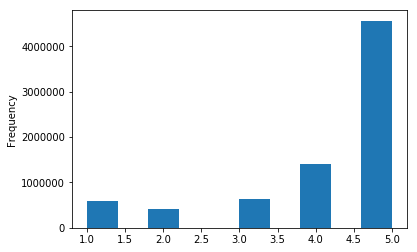

In [17]:
df['rating'].plot(kind = 'hist')

#### Trustworthiness Ratings: 

The ratings have a right peak and a long left tail. The mean rating is also less than the median rating. The ratings are positively biased which is primarily due to a selection bias of reviewers being primarily positive either for honest or disingenuous reasons. 

In [18]:
category = json_normalize(dict_all, 'cat_entries', 
                          ['ASIN','group','categories'])
category.head()

,category,ASIN,group,categories
0,|Books[283155]|Subjects[1000]|Religion&Spiritu...,0827229534,Book,2
1,|Books[283155]|Subjects[1000]|Religion&Spiritu...,0827229534,Book,2
2,|Books[283155]|Subjects[1000]|Religion&Spiritu...,0738700797,Book,2
3,|Books[283155]|Subjects[1000]|Religion&Spiritu...,0738700797,Book,2
4,|Books[283155]|Subjects[1000]|Home&Garden[48]|...,0486287785,Book,1


<span class="badge badge-pill badge-default">Keep Up Challenge</span>
<div class="alert alert-success" role="alert">
  <p><b>Question and Answer Summary</b></p>
<p></p>
<p></p>
<b>Algorithmic Thinking</b>
<li>How would you build product categorization from scratch, using similar/co-purchased information?
<p></p>
<p></p>
Building product categorization from scratch, I would start with the idea of how customers want to find the product they want. This means that the first category filter will narrow down the search to product type. From here, sub-categories are created/modified based on past "similar/co-purchased information" to further filter out the products. One caveat is that because customers buy a set of diverse products, it may not be that informative to use co-purchased information across categories. 
<p></p><p></p>
<b>Question Set</b>
<p></p>
<b>a.</b> Is it a good idea to show users the categorization hierarchy for items? 
<p></p>
<p></p>
It depends on your user. For those that would like to understand the logic of how the algorithm classifies products so that the user can make smarter searches in the futute, showing the users the categorization hierarchy can make sense. For those users that feel bogged down with the length of the categorizatuion, it might not help though.
<p></p>
<p></p>
<b>b.</b> Is it a good idea to show users similar/co-purchased items? 
<p></p>
<p></p>
It is a good idea to show similar/co-purchased items "within" the category group. As consumers purchase a set of diverse products, it is not necessarily informative or relevant to show a product from a different category. For example, if one buys deodarant, it is not necessarily informative to show that the same person bought a lawnmower as one assumes that the purchases were done with different factors and motivations in mind. 
<p></p>
<p></p>
<b>c.</b> Is it a good idea to show users reviews and ratings for items? 
<p></p>
<p></p>
Based on what we've seen with the biases in ratings, it is likely not worth showing users the simple ratings. A better rating system would compare the rating of the individual product to ratings in its category or the ratings in the system overall. With resepct to reviews, a sentiment analysis of the text reviews could be helpful in qualifying the ratings. 
<p></p>
<p></p>
<b>d.</b> For each of the above, why? How will you establish the same?
<p></p>
<p></p>
To implement, one can use A/B testing to determine if these create improved searches. Metrics worth reviewing include "speed of purchase", "speed of search", and "purchases of new products from similar/co-purchased items".
<p></p>
<p></p>